# Statistical Convergence Verification Case

## Convergence case for ...

This notebook runs a user set number of convergence cases and plots varisous flow properties to compare and verifiy the statistical convergence of the simulations.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
#First things first change to your working directory containing your HiPSTAR case
import os
os.chdir('/home/rp3e11/drive1/thesis_cases/HPT_andy_post/finegrid/convergence/')
casedir=os.getcwd()

In [4]:
name_for_files='fine_grid'

In [5]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True

In [6]:
mon_point=False
if mon_point:
    mon_point_id=2
    var_index=7
    skip=10
    save_fig=False
    #======================================
    #  end user input
    #======================================

    start_name='monitor_point_%i'%mon_point_id
    files= os.listdir('../mon_point/')
    red_files=[]
    for f in files:
        if f.startswith(start_name):
            temp='../mon_point/'+f
            red_files.append(temp)

    red_files.sort()
    time=[]
    step=[]
    var=[]
    for f in red_files:
        file1=open(f,'r')
        count=1
        for line in file1:
            if count==0:
                li=line.split()
                step.append(float(li[0]))
                time.append(float(li[1]))
                var.append(float(li[var_index]))
                count=10
            else:
                count-=count
    plt.figure()
    plt.plot(step,var)
    plt.xlabel('timestep')
    plt.ylabel('var')
    if save_fig:
        plt.savefig('time_hist_var.pdf')
     

In [7]:
#get list of directories to loop though
postdir =  os.walk('.').next()[1]
postdir = [casedir+'/'+i for i in postdir]

# Wake plots

Plot wake values of each statistics run and compare 

In [8]:
#USER INPUT
#Change if you want a different down stream plane
# Specify the down stream wake plane you want with [[x,y][x,y]] 
# add other planes by adding the same format
wp=[[[-.3,-0.2],[-.3,0.7]],[[0.9,-.75],[0.9,0.4]],[[1.1,-.75],[1.1,0.4]],[[1.26,-.75],[1.26,0.4]]]

In [9]:
#Extract lines from each convergence case
inf=lh.infile('../vki3d.in')
dt=inf.dth
wake=[]
for j in wp:
    wake.append(l.lines())

    for i in postdir:
        d=i.split('/')
        d=d[-1].split('_')
        d1=float(d[0])*dt
        d2=float(d[2])*dt
        d="%4.1f to %4.1f"%(d1,d2)
        wake[-1].extr_line(j[0],j[1],200,i+'/ASME_post.bin',force_read=True,label=d)
        wake[-1].order_ymin()


Extracting line
Found 200 points.
Extracting line
Found 200 points.
Extracting line
Found 153 points.
Extracting line
Found 153 points.
Extracting line
Found 146 points.
Extracting line
Found 146 points.
Extracting line
Found 157 points.
Extracting line
Found 157 points.


Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  0.9
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.26
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


/home/rp3e11/codes/PLATUS/matplotlib2tikz.py:1401: UserWarning: Unknown legend location 0. Using default.
  % obj._loc)


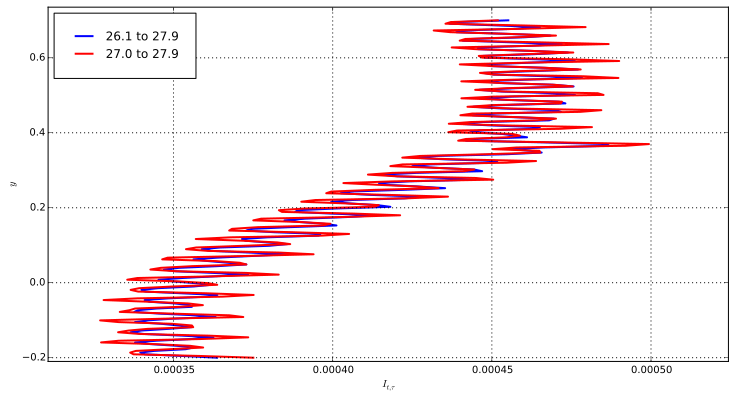

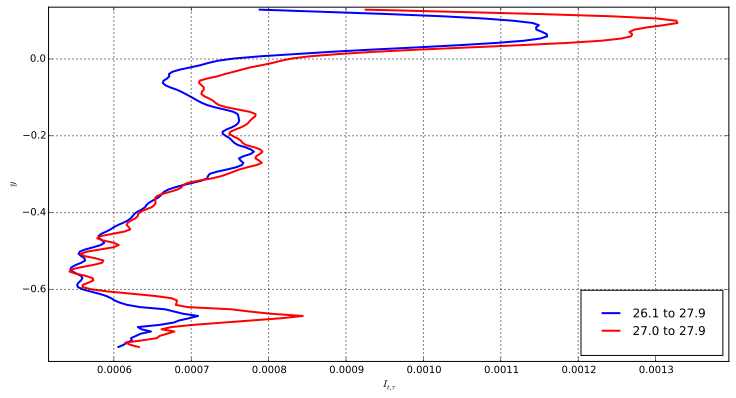

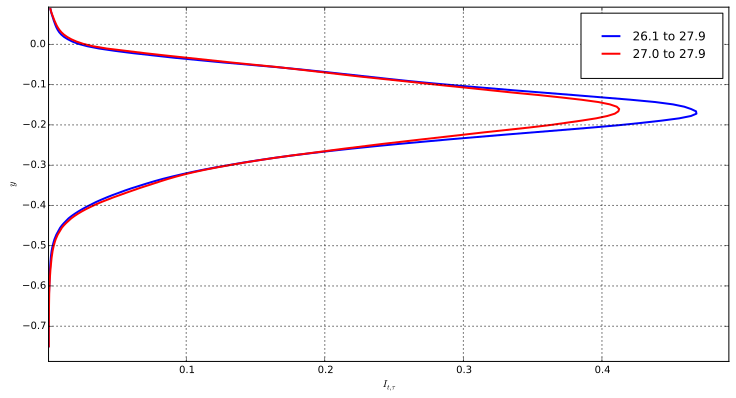

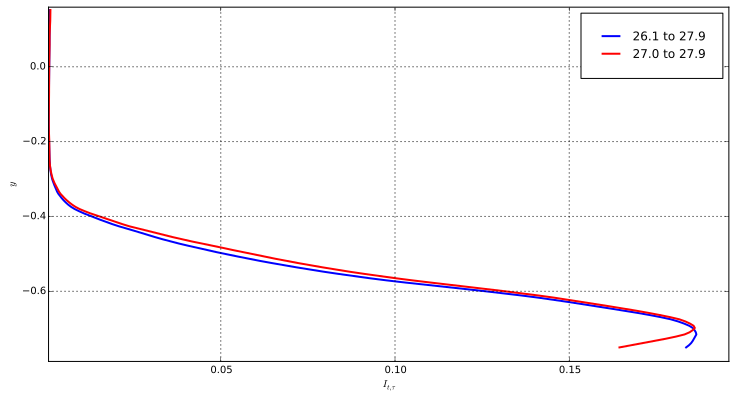

In [10]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,21))




for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_TI_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_TI_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.26
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


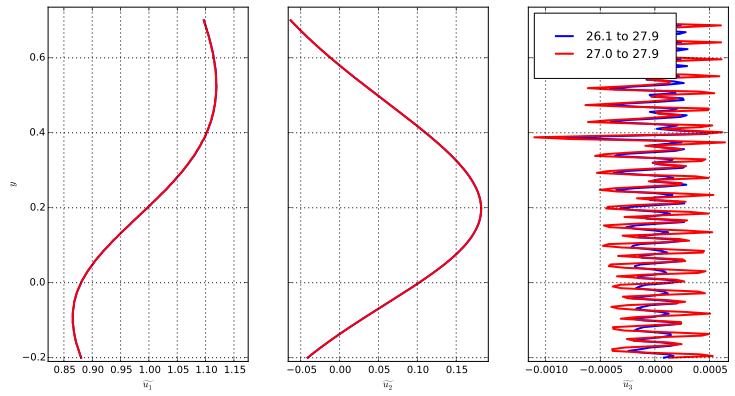

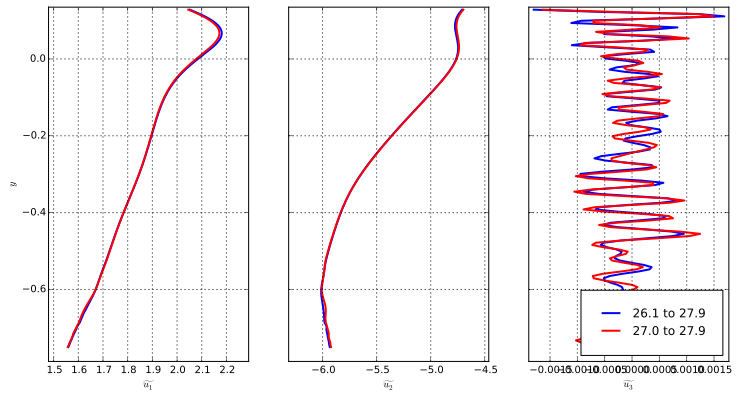

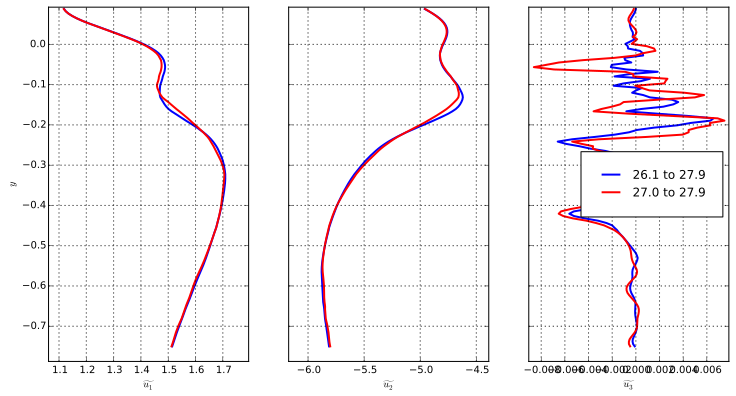

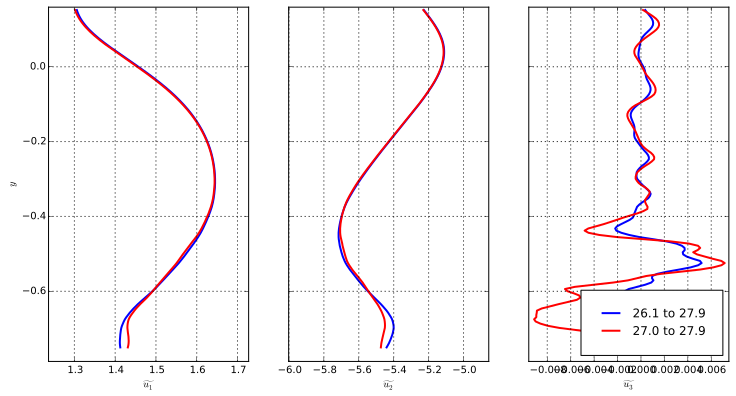

In [11]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,2))
plot_ids.append(wake[0].l[0].var.get_index(216,3))
plot_ids.append(wake[0].l[0].var.get_index(216,16))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_mean_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_mean_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.26
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


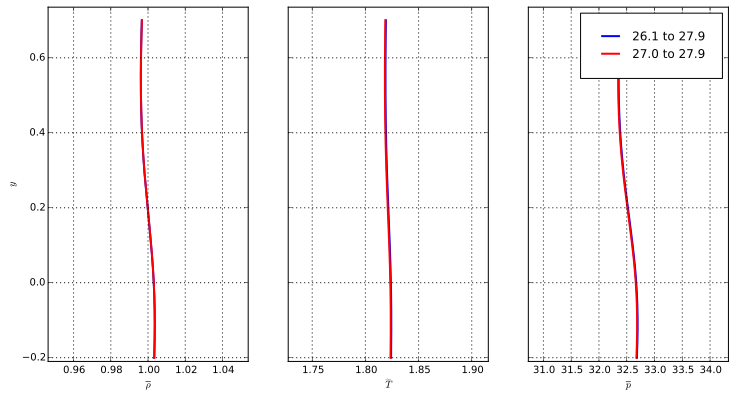

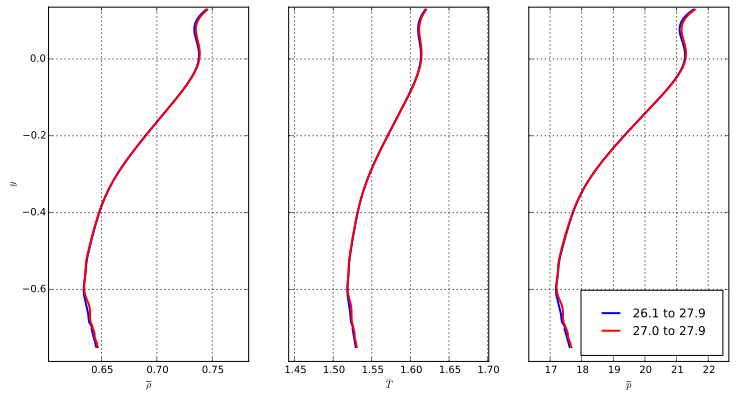

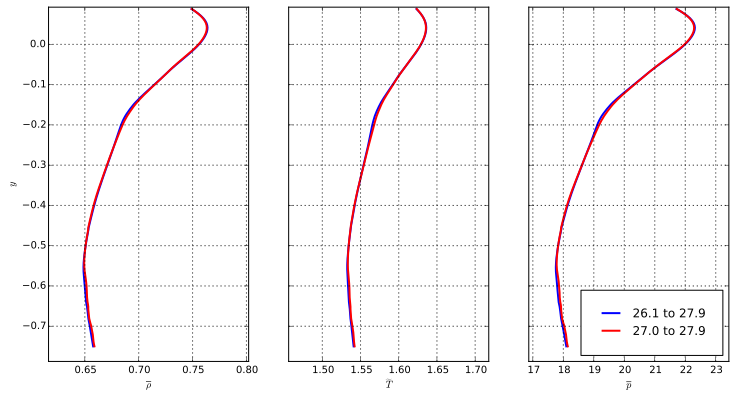

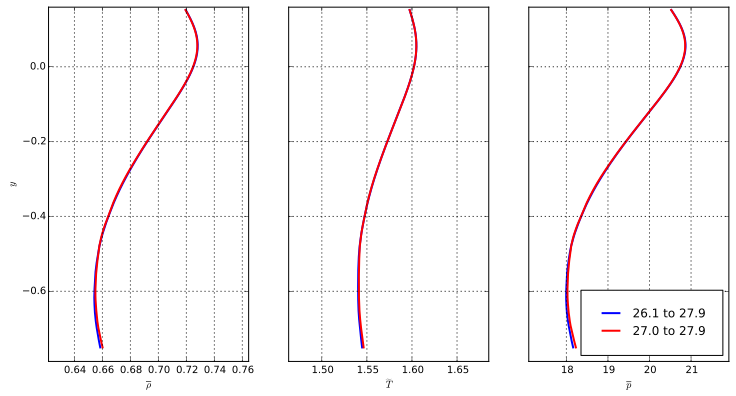

In [12]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,1))
plot_ids.append(wake[0].l[0].var.get_index(216,4))
plot_ids.append(wake[0].l[0].var.get_index(216,5))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_therm_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_therm_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.26
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


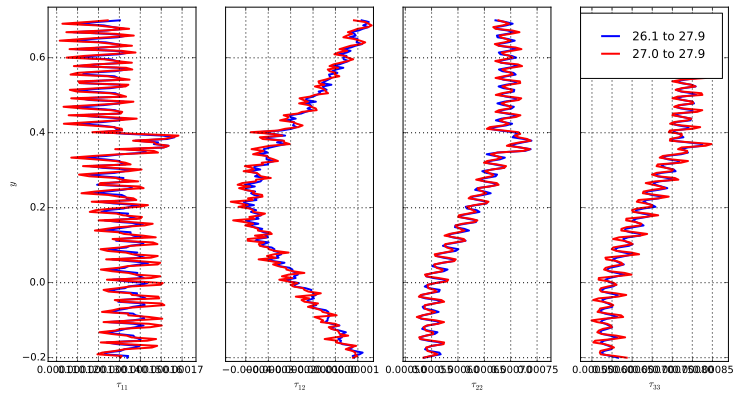

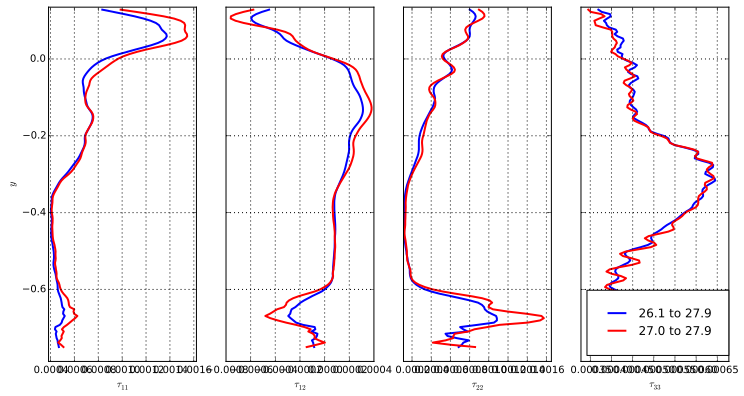

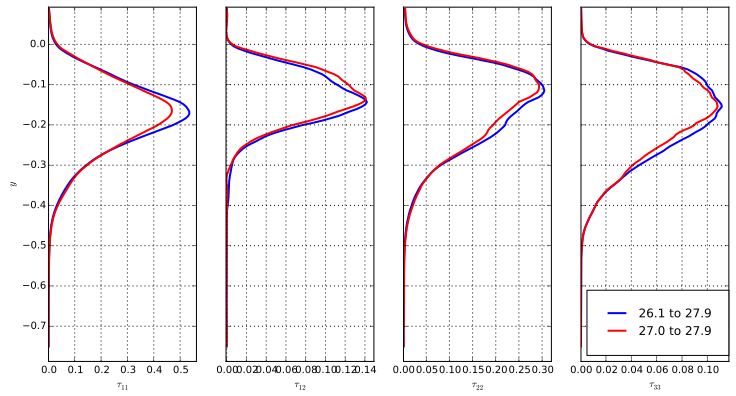

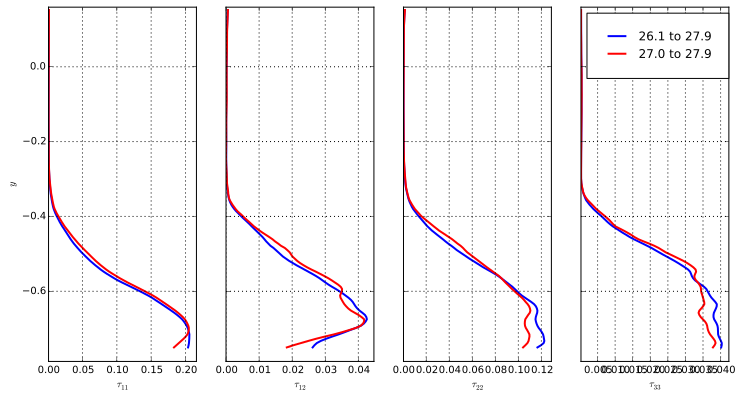

In [13]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,10))
plot_ids.append(wake[0].l[0].var.get_index(216,11))
plot_ids.append(wake[0].l[0].var.get_index(216,12))
plot_ids.append(wake[0].l[0].var.get_index(216,13))


for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tau_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tau_%s_%i.pdf"%(name_for_files,j))  

Wake profiles for x position:  -0.3
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.26
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


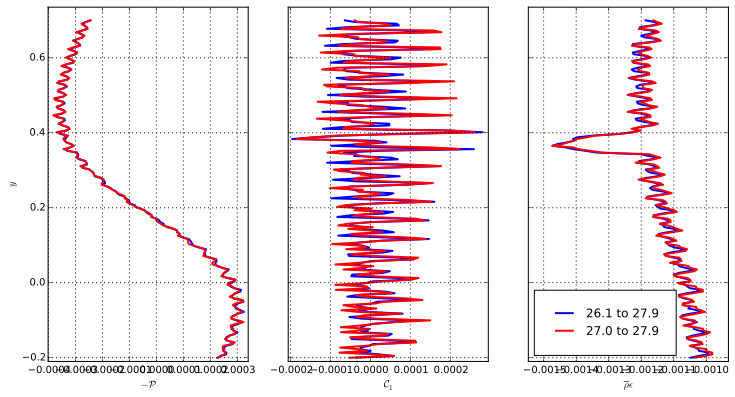

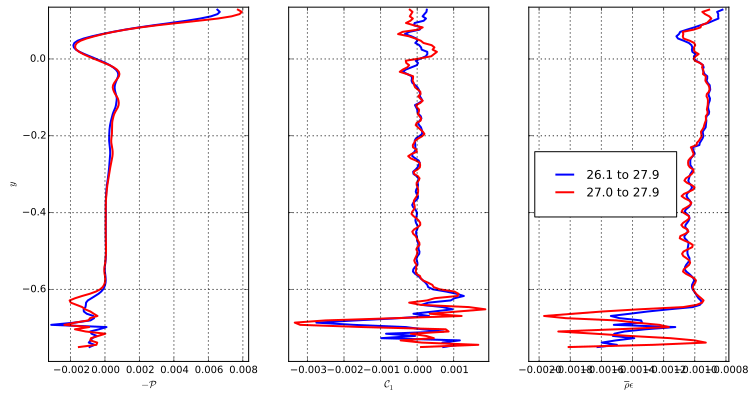

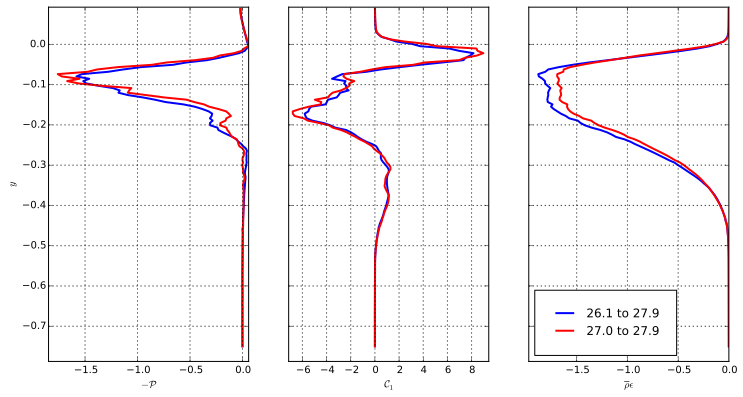

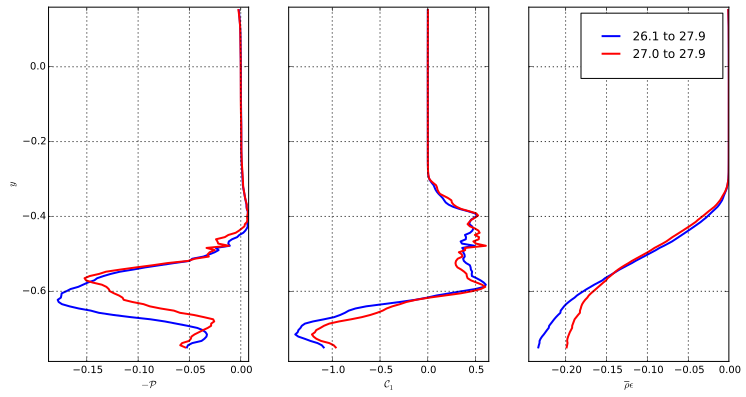

In [14]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(209,8))
plot_ids.append(wake[0].l[0].var.get_index(209,5))
plot_ids.append(wake[0].l[0].var.get_index(209,9))



for j in range(3):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tke_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tke_%s_%i.pdf"%(name_for_files,j))

In [15]:
ls

2606870_to_2794870/              stat_conv_mean_fine_grid_2.tikz  stat_conv_tau_fine_grid_2.pdf     stat_conv_therm_fine_grid_1.tikz  stat_conv_TI_fine_grid_1.pdf   stat_conv_tke_fine_grid_0.tikz
2698870_to_2794870/              stat_conv_mean_fine_grid_3.pdf   stat_conv_tau_fine_grid_2.tikz    stat_conv_therm_fine_grid_2.pdf   stat_conv_TI_fine_grid_1.tikz  stat_conv_tke_fine_grid_1.pdf
stat_conv_mean_fine_grid_0.pdf   stat_conv_mean_fine_grid_3.tikz  stat_conv_tau_fine_grid_3.pdf     stat_conv_therm_fine_grid_2.tikz  stat_conv_TI_fine_grid_2.pdf   stat_conv_tke_fine_grid_1.tikz
stat_conv_mean_fine_grid_0.tikz  stat_conv_tau_fine_grid_0.pdf    stat_conv_tau_fine_grid_3.tikz    stat_conv_therm_fine_grid_3.pdf   stat_conv_TI_fine_grid_2.tikz  stat_conv_tke_fine_grid_2.pdf
stat_conv_mean_fine_grid_1.pdf   stat_conv_tau_fine_grid_0.tikz   stat_conv_therm_fine_grid_0.pdf   stat_conv_therm_fine_grid_3.tikz  stat_conv_TI_fine_grid_3.pdf   stat_conv_tke_fine_grid_2.tikz
stat_conv_mean_fine_gr

## Selected case

In [16]:
case_index=0
filen='../convergence_new/'+postdir[case_index].split('/')[-1]+'/STAT_cont.bin'
print filen

../convergence_new/2606870_to_2794870/STAT_cont.bin


In [18]:
cascade=l.cascade_mean(-0.3,1.26,filename=filen,infile='../vki3d.in',Refplane='Outlet')

reading data from file previously extracted
Extracting line
Found 394 points.
extract line from (i,j) 448 1  to  448 1760  in block  4 1760
4
extract line from (i,j) 448 1  to  448 480  in block  3 480
4
extract line from (i,j) 448 1  to  448 1760  in block  5 1760
4
extract line from (i,j) 448 1  to  448 800  in block  7 800
4

/home/rp3e11/codes/PLATUS/lines.py:1318: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS/lines.py:1321: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS/lines.py:1323: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS/lines.py:1439: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.len_el==None:



len=1.57106134295
len=1.57052764297
Warning!!!
chord length provided does not agree with chord length computed from the data
chord length is    1.7427353413
Warning!!!


In [ ]:
plt.figure()
plt.plot(cascade.blade.data[:,0],cascade.cp)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$c_p= \\frac{p(x)-p_{out}}{p_{t,in}-p_{out}}$')
tikz_save("cp_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [ ]:
plt.figure()
plt.plot(cascade.loss_mix,cascade.outlet.data[:,1])
plt.grid()
plt.ylabel('$x$')
plt.xlabel('$\omega= \\frac{p_{t,in}-p_{t,out}(y)}{p_{t,in}-p_{out}}$')
tikz_save("wake_loss.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [ ]:
cascade.report_integral_mixed_out()

# Monitor point trends

Analyze monitor points for one upstream and down stream position to check for trends

In [ ]:
import mon_points as mp

## Write out data to compare cases

In [19]:
case_index=0
print postdir[case_index]
stat_file=postdir[case_index]+'/ASME_post.bin'

/media/drive1/thesis_cases/HPT_andy_post/finegrid/convergence/2606870_to_2794870


In [20]:
rho_ind=wake[1].l[case_index].var.get_index(216,1)
u_ind=wake[1].l[case_index].var.get_index(216,2)
v_ind=wake[1].l[case_index].var.get_index(216,3)
p_ind=wake[1].l[case_index].var.get_index(216,5)
T_ind=wake[1].l[case_index].var.get_index(216,4)
tau11_ind=wake[1].l[case_index].var.get_index(216,10)
tau22_ind=wake[1].l[case_index].var.get_index(216,12)
tau33_ind=wake[1].l[case_index].var.get_index(216,13)
tau12_ind=wake[1].l[case_index].var.get_index(216,11)
tau33_ind=wake[1].l[case_index].var.get_index(216,13)
P_ind=wake[1].l[case_index].var.get_index(209,8)
eps_ind=wake[1].l[case_index].var.get_index(209,9)
k_ind=wake[1].l[case_index].var.get_index(207,1)
Ti_ind=wake[1].l[case_index].var.get_index(216,21)

In [21]:
for i in range(3):
    dataset=wake[i+1].l[case_index]
    outlet_comp_file='outlet_comp_%s_%i.dat'%(name_for_files,i+1)
    of=open(outlet_comp_file,'w')
    of.write('%25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s\n'%('y','rho_bar','u_tile','v_tile','p_bar','T_tile','tau_11,','tau_22','tau_33','tau_12,','k','P','epsilon'))
    of.write('x=%15.8f, npoints = %i\n'%(dataset.data[0,0],dataset.npoints))    
    for j in range(dataset.npoints):
            of.write('%25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f\n'%(dataset.data[j,1],dataset.data[j,rho_ind],dataset.data[j,u_ind],dataset.data[j,v_ind],
                                   dataset.data[j,p_ind],dataset.data[j,T_ind],-dataset.data[j,tau11_ind],-dataset.data[j,tau22_ind],
                                   -dataset.data[j,tau33_ind],-dataset.data[j,tau12_ind],dataset.data[j,k_ind],-dataset.data[j,P_ind],dataset.data[j,eps_ind]))          
    of.close()